In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import losses, metrics, optimizers
from sklearn.metrics import classification_report


In [62]:
def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')    

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [63]:
# Завантажимо датасет

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train.shape, y_train.shape, x_test.shape, y_test.shape



((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

n = 5, layer1: 32


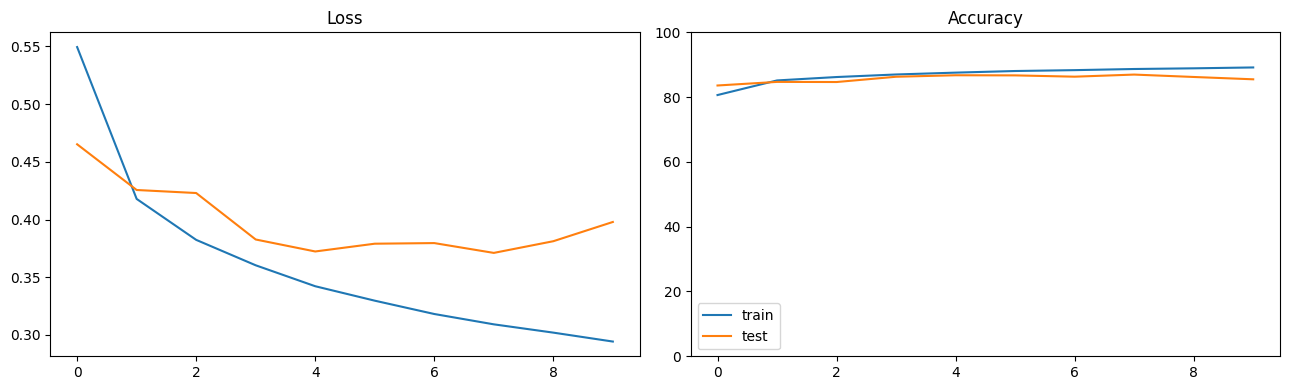

n = 6, layer1: 64


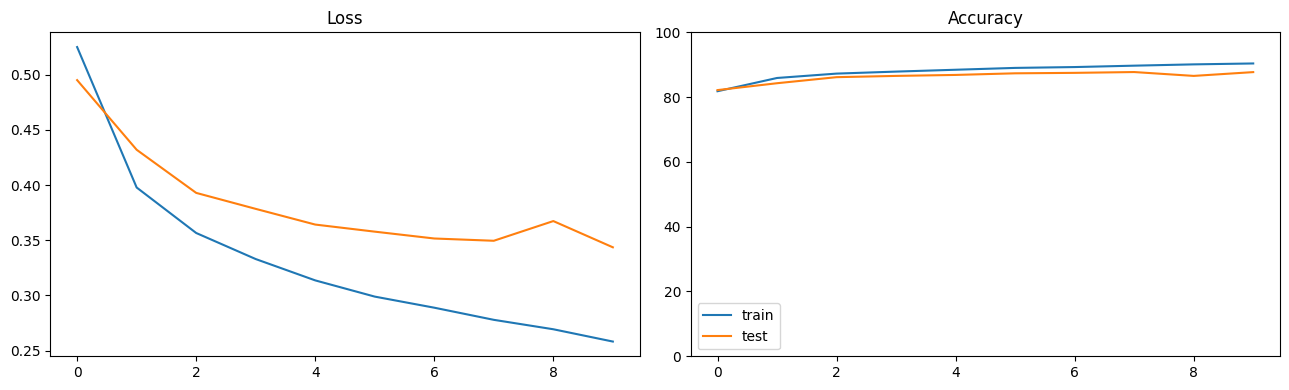

n = 7, layer1: 128


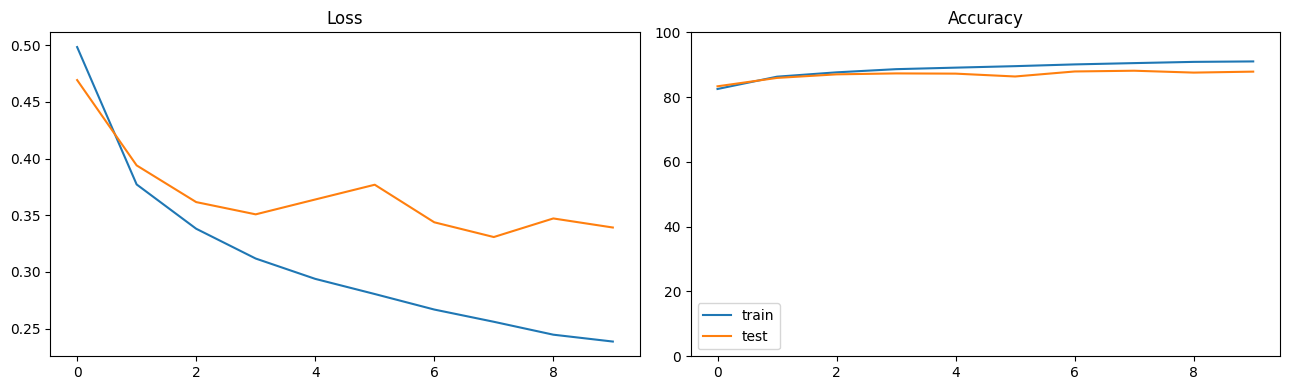

n = 8, layer1: 256


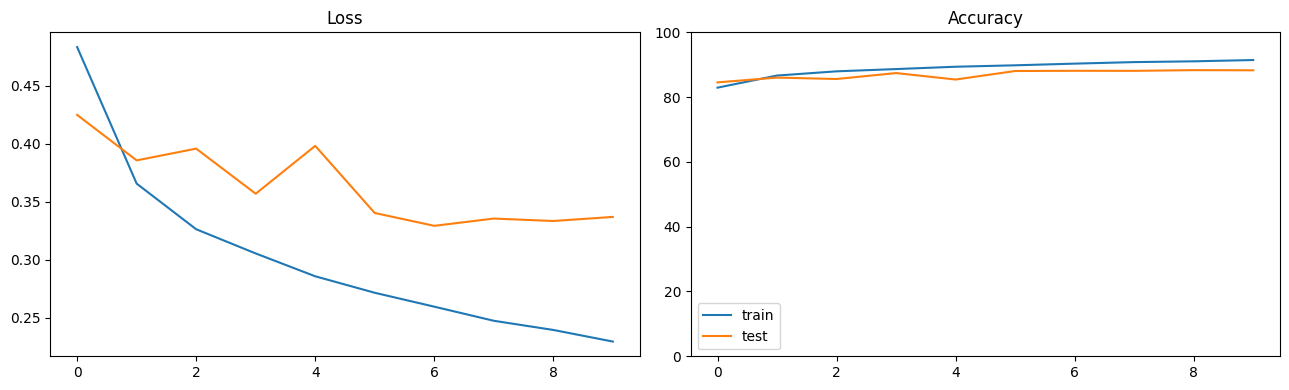

n = 9, layer1: 512


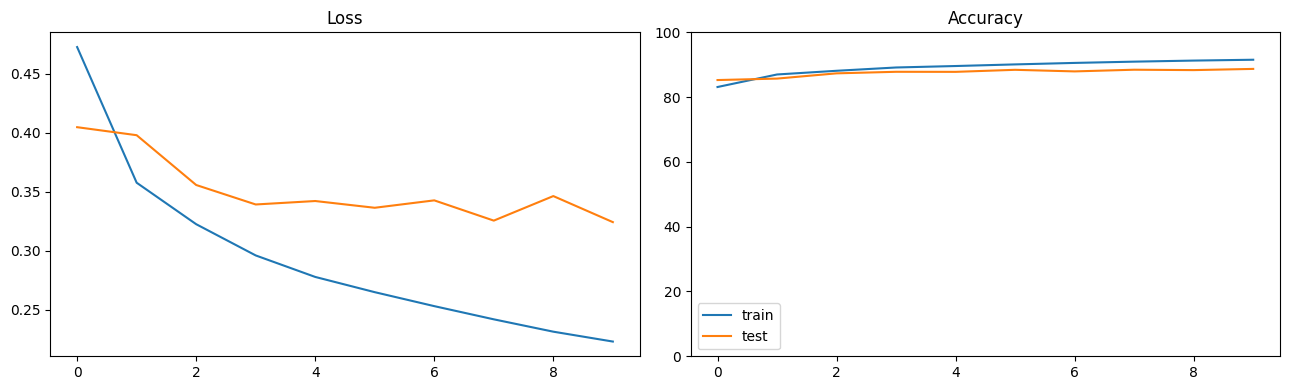

n = 10, layer1: 1024


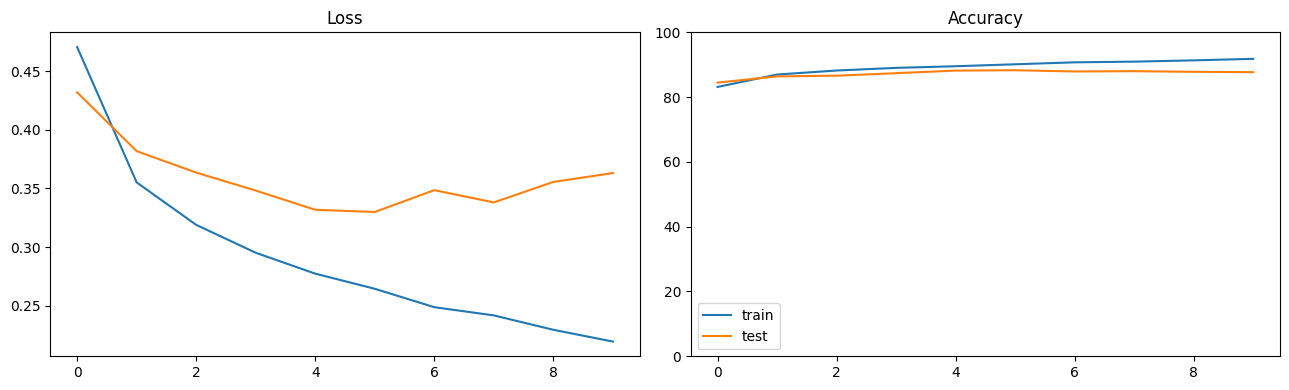

,0,1,2,3,4,5,6,7,8,9
"n = 5, layer1: 32",0.835900,0.847000,0.846600,0.862900,0.867500,0.867100,0.863100,0.869600,0.862200,0.855000
"n = 6, layer1: 64",0.821700,0.842900,0.861600,0.865500,0.868500,0.873500,0.874900,0.877400,0.865500,0.877200
"n = 7, layer1: 128",0.833400,0.859300,0.870300,0.873200,0.872500,0.863700,0.879200,0.881500,0.875700,0.878700
"n = 8, layer1: 256",0.845500,0.860300,0.855900,0.874300,0.854300,0.880600,0.881300,0.881100,0.883300,0.882800
"n = 9, layer1: 512",0.852700,0.857200,0.873400,0.878200,0.878000,0.884300,0.879400,0.884600,0.883400,0.887100
"n = 10, layer1: 1024",0.844700,0.864000,0.866100,0.873900,0.881900,0.883000,0.879200,0.880100,0.878200,0.877000


In [65]:
# Визначення параметрів почнемо з нейронної мережі (далі НМ), що містить один шар.
# Створимо декілька НМ з різною кількістю нейронів в шарі.
# Кількість нейронів будем визначати як ступінь 2.
# Активаційну функцію прихованих шарів оберемо relu; на вихідного шару — softmax;
# оптимізатор — Adam; кількість епох — 10. Інші параметри по замовчуванню.
# В якості критерію оцінки НН будемо використовувати Accuracy на тестовій вибірці:

histories = {}
for n in range(5, 11):
    n_hidden_1 = 2 ** n
    print(f"n = {n}, layer1: {n_hidden_1}")

    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(n_hidden_1, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    model.compile(
        loss=losses.SparseCategoricalCrossentropy(),
        optimizer=optimizers.Adam(),
        metrics=[metrics.SparseCategoricalAccuracy()]
    )

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
    plot_history(history)
    histories[f"n = {n}, layer1: {n_hidden_1}"] = history.history["val_sparse_categorical_accuracy"]

pd.DataFrame(histories).T.style.background_gradient(cmap='viridis')

# Найкращі результати показали НМ з кількістю нейронів 128, 256 і 512

n = 6, layer1: 64, layer2: 32


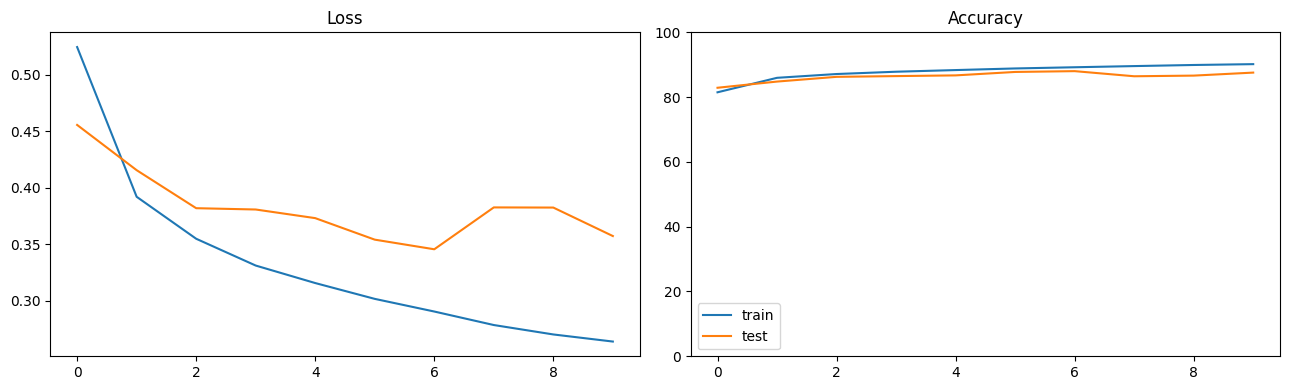

n = 6, layer1: 64, layer2: 64


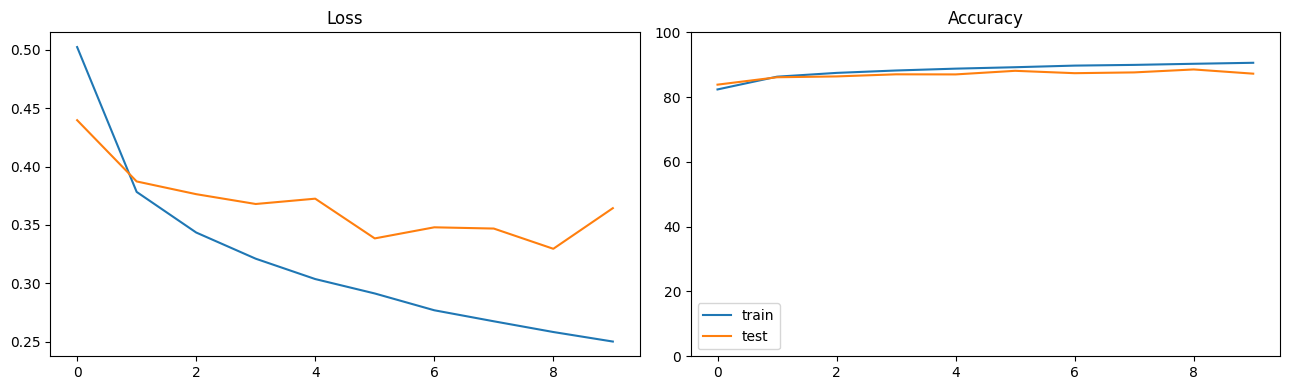

n = 6, layer1: 64, layer2: 128


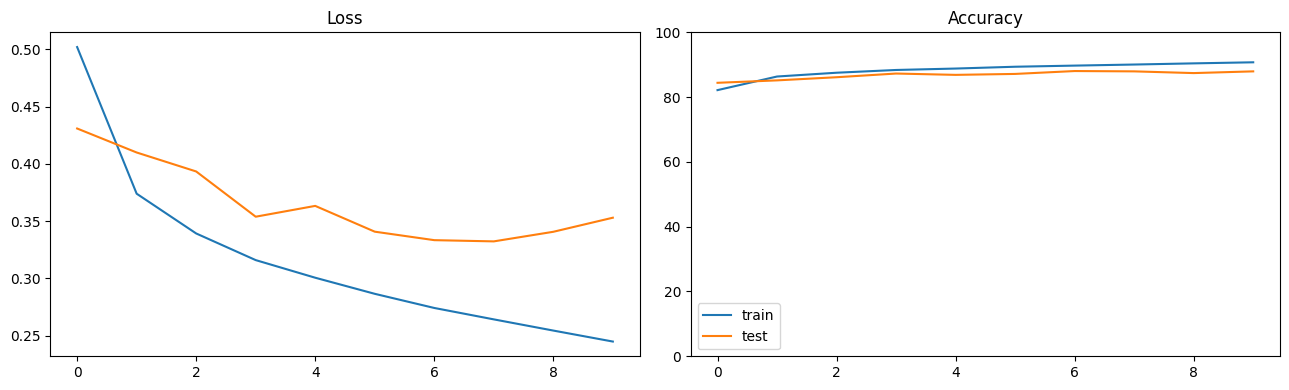

n = 7, layer1: 128, layer2: 64


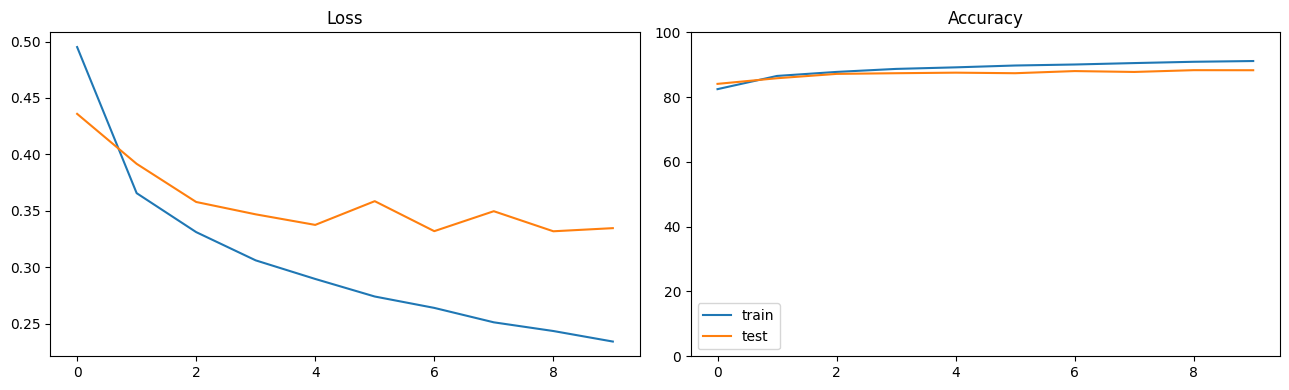

n = 7, layer1: 128, layer2: 128


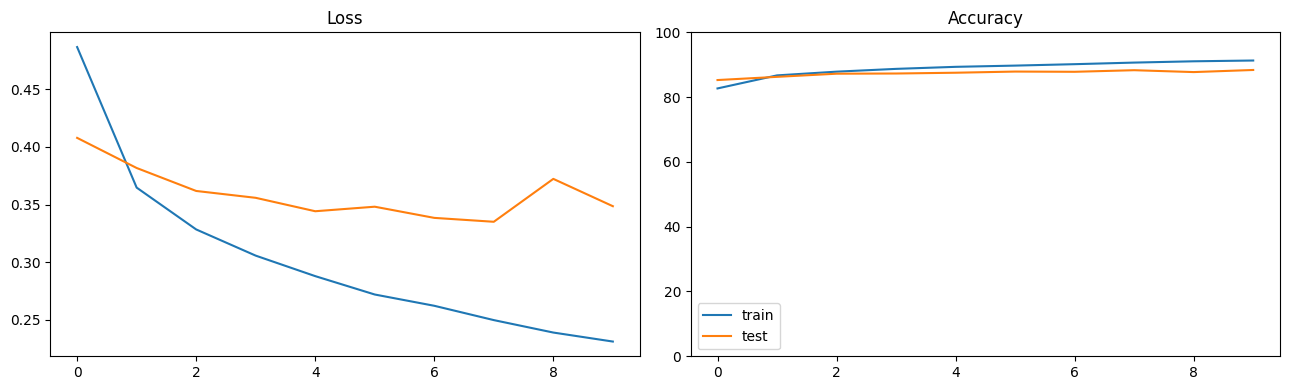

n = 7, layer1: 128, layer2: 256


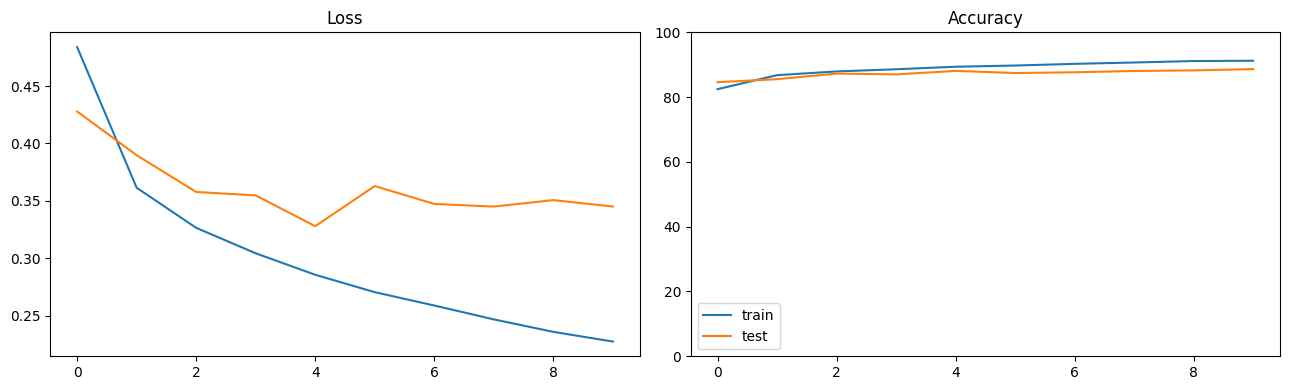

n = 8, layer1: 256, layer2: 128


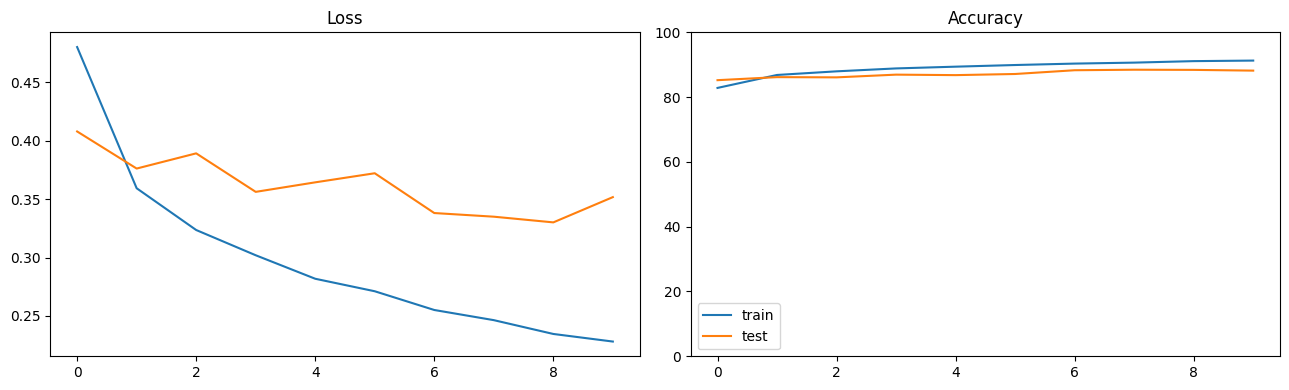

n = 8, layer1: 256, layer2: 256


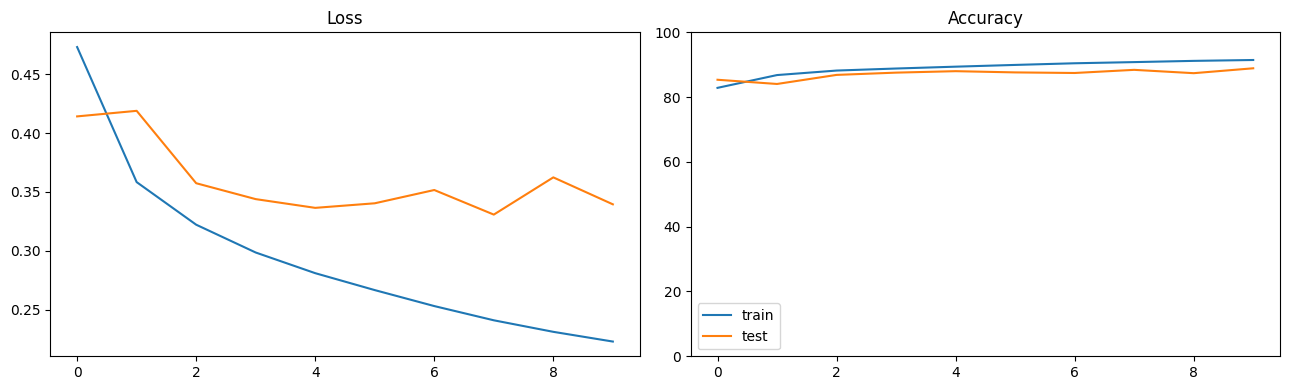

n = 8, layer1: 256, layer2: 512


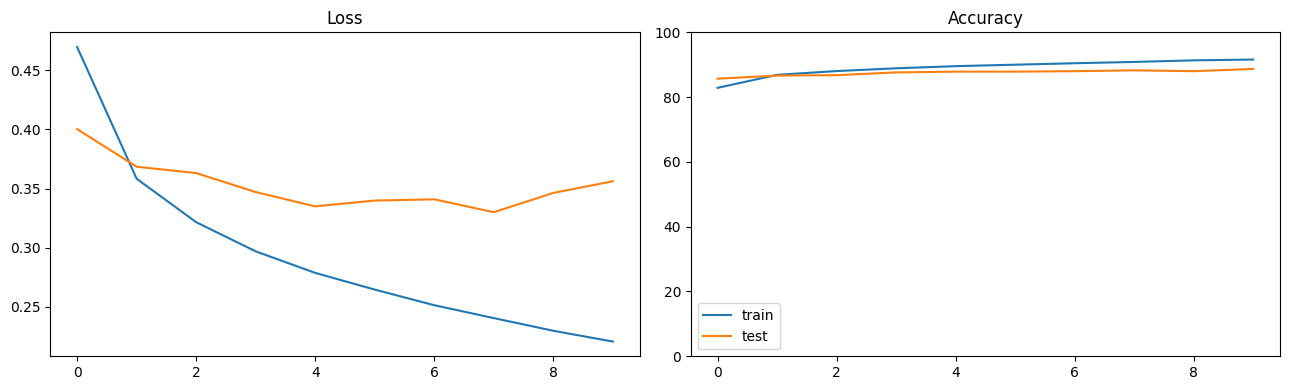

,0,1,2,3,4,5,6,7,8,9
"n = 5, layer1: 32",0.835900,0.847000,0.846600,0.862900,0.867500,0.867100,0.863100,0.869600,0.862200,0.855000
"n = 6, layer1: 64",0.821700,0.842900,0.861600,0.865500,0.868500,0.873500,0.874900,0.877400,0.865500,0.877200
"n = 7, layer1: 128",0.833400,0.859300,0.870300,0.873200,0.872500,0.863700,0.879200,0.881500,0.875700,0.878700
"n = 8, layer1: 256",0.845500,0.860300,0.855900,0.874300,0.854300,0.880600,0.881300,0.881100,0.883300,0.882800
"n = 9, layer1: 512",0.852700,0.857200,0.873400,0.878200,0.878000,0.884300,0.879400,0.884600,0.883400,0.887100
"n = 10, layer1: 1024",0.844700,0.864000,0.866100,0.873900,0.881900,0.883000,0.879200,0.880100,0.878200,0.877000
"n = 6, layer1: 64, layer2: 32",0.828900,0.848000,0.862600,0.864900,0.867100,0.877700,0.880200,0.864400,0.866400,0.875700
"n = 6, layer1: 64, layer2: 64",0.838500,0.861300,0.863900,0.870400,0.870100,0.881200,0.873900,0.876300,0.885400,0.872400
"n = 6, layer1: 64, layer2: 128",0.844200,0.851700,0.861400,0.872800,0.868700,0.871600,0.880500,0.879500,0.874200,0.879500
"n = 7, layer1: 128, layer2: 64",0.840900,0.858300,0.871700,0.873800,0.875500,0.873800,0.880400,0.877700,0.883200,0.883000


In [67]:
# Оцінимо результат роботи двошарової НМ. Спробуємо різні комбінації кількості нейронів в шарах: 64, 128, 256.
# Другий шар будемо брати або в два рази менший за перший, або рівний першому, або в два рази більший:

for n in range(6, 9):
    for i in [-1, 0, 1]:
        n_hidden_1 = 2 ** n
        n_hidden_2 = 2 ** (n + i)
        print(f"n = {n}, layer1: {n_hidden_1}, layer2: {n_hidden_2}")

        model = Sequential()
        model.add(Flatten(input_shape=(28, 28)))
        model.add(Dense(n_hidden_1, activation="relu"))
        model.add(Dense(n_hidden_2, activation="relu"))
        model.add(Dense(10, activation="softmax"))

        model.compile(
            loss=losses.SparseCategoricalCrossentropy(),
            optimizer=optimizers.Adam(),
            metrics=[metrics.SparseCategoricalAccuracy()]
        )

        history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
        plot_history(history)
        histories[f"n = {n}, layer1: {n_hidden_1}, layer2: {n_hidden_2}"] = history.history["val_sparse_categorical_accuracy"]

pd.DataFrame(histories).T.style.background_gradient(cmap='viridis')

# Додавання другого шару не призвело до помітного покращення Accuracy на тестовій виборці.
# Що означає, що одношарової НМ буде достатньо для задачі класифікації даного датасету.
# Для подальшої роботи будемо використовувати одношарову НН, з кількістю нейронів 256.

n = 8, layer1: 256
Activation function: linear


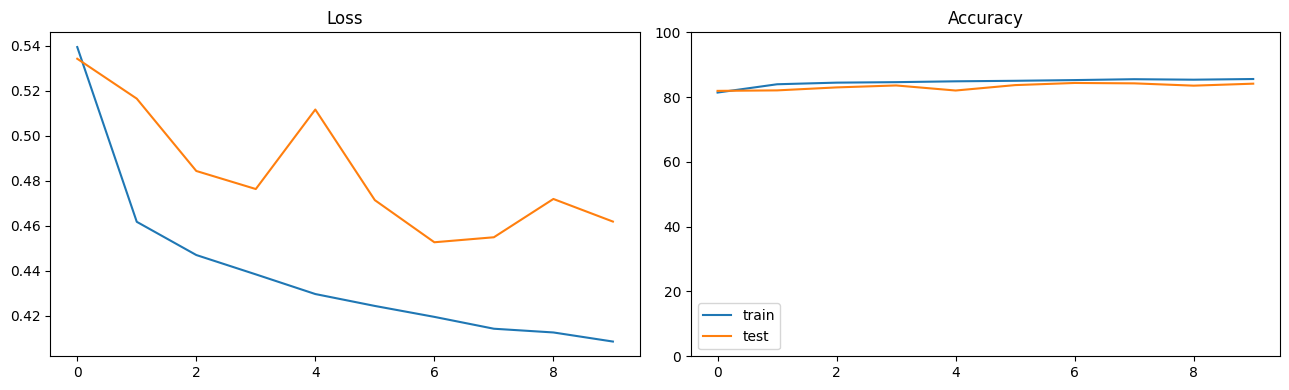

Activation function: relu


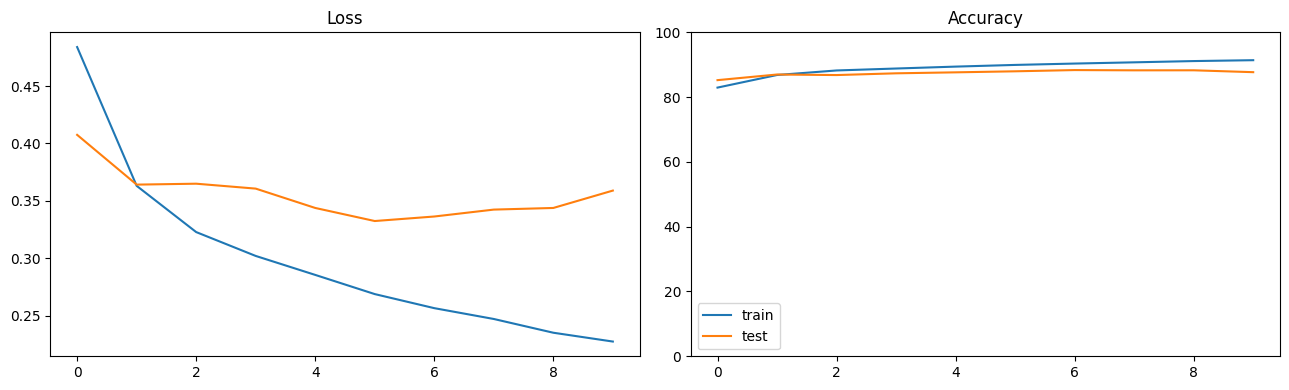

Activation function: leaky_relu


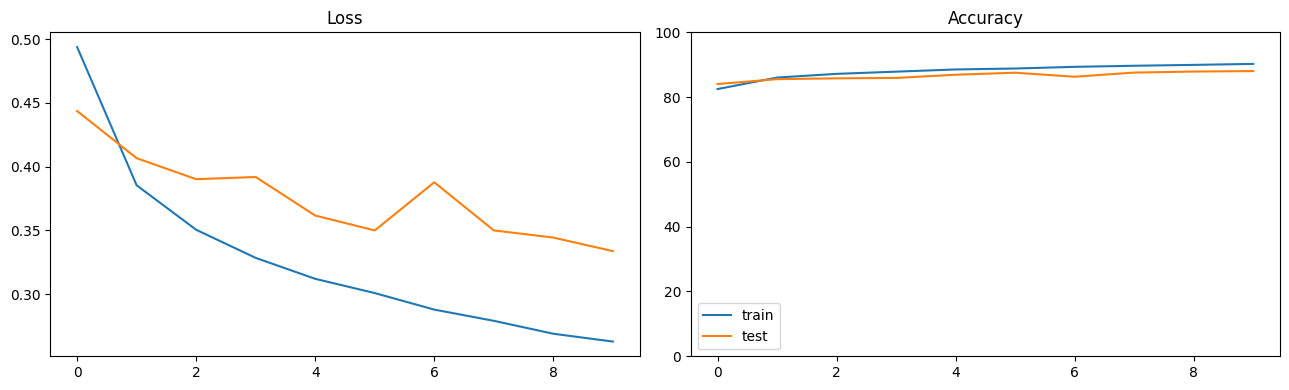

Activation function: tanh


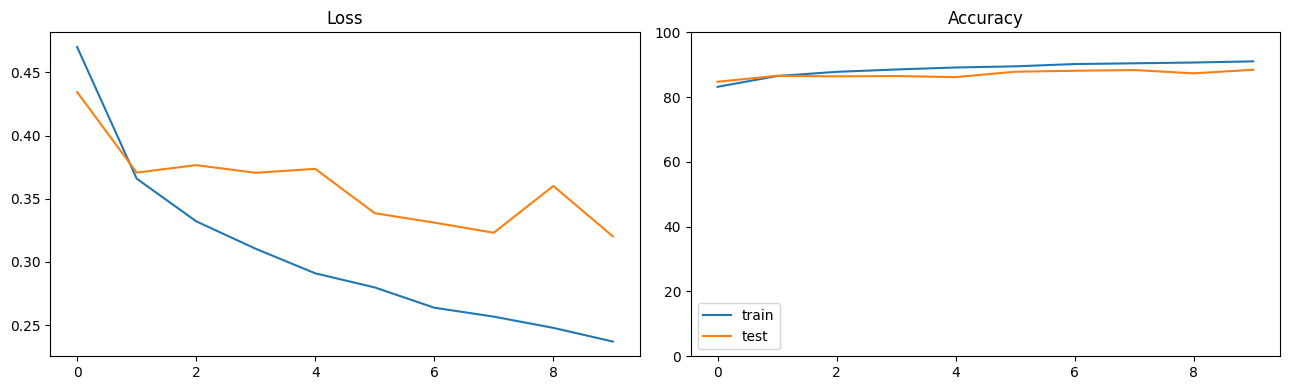

Activation function: elu


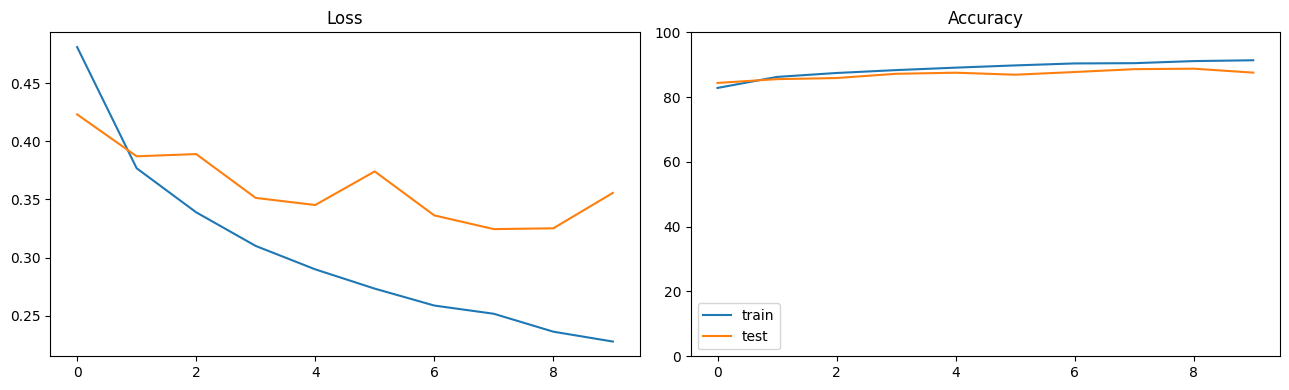

Activation function: softplus


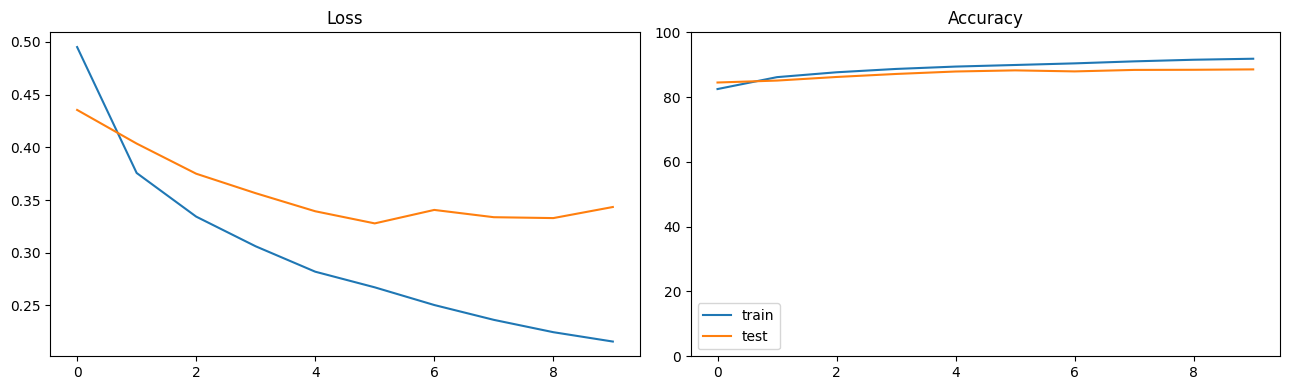

Activation function: sigmoid


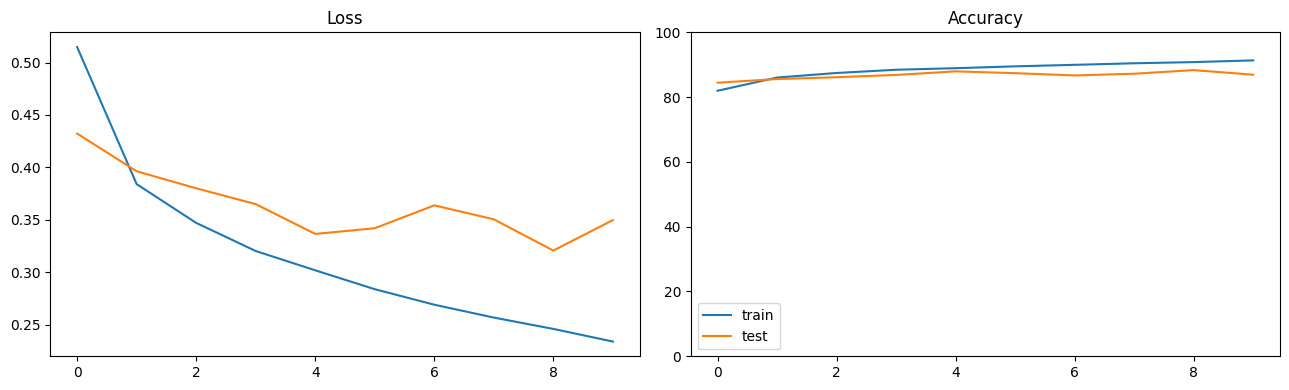

,0,1,2,3,4,5,6,7,8,9
Activation function: linear,0.819300,0.820800,0.830000,0.836000,0.820400,0.837100,0.843700,0.842500,0.835400,0.841500
Activation function: relu,0.852400,0.869800,0.868100,0.873500,0.876500,0.879700,0.883500,0.882700,0.882800,0.877000
Activation function: leaky_relu,0.840400,0.855400,0.858000,0.859300,0.869100,0.875400,0.862900,0.875800,0.878900,0.880500
Activation function: tanh,0.847400,0.865800,0.864100,0.865100,0.861700,0.878400,0.881300,0.883600,0.873400,0.884500
Activation function: elu,0.843800,0.855500,0.858900,0.872000,0.875400,0.869200,0.877500,0.886300,0.887800,0.875600
Activation function: softplus,0.845100,0.851100,0.862200,0.871500,0.879100,0.882600,0.879400,0.884000,0.884400,0.885600
Activation function: sigmoid,0.844500,0.855800,0.861400,0.868500,0.879500,0.873900,0.867000,0.872200,0.883400,0.869200


In [69]:
# Оцінимо результат роботи НМ з застосуванням різних функцій активації:

histories = {}
activation_list = [
    'linear',
    'relu',
    'leaky_relu',
    'tanh',
    'elu',
    'softplus',
    'sigmoid'
]

n = 8
n_hidden_1 = 2 ** n
print(f"n = {n}, layer1: {n_hidden_1}")

for act in activation_list:
    print(f"Activation function: {act}")
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(n_hidden_1, activation=act))
    model.add(Dense(10, activation="softmax"))

    model.compile(
        loss=losses.SparseCategoricalCrossentropy(),
        optimizer=optimizers.Adam(),
        metrics=[metrics.SparseCategoricalAccuracy()]
    )

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
    plot_history(history)
    histories[f"Activation function: {act}"] = history.history["val_sparse_categorical_accuracy"]

pd.DataFrame(histories).T.style.background_gradient(cmap='viridis')

# Вибір функції relu цілком виправданий, вона показує непоганий результат.
# По формальній ознаці найкращій результат показала функція softplus.
# Її і будемо використовувати в подальшому.

n = 8, layer1: 256
Optimizer: Adam


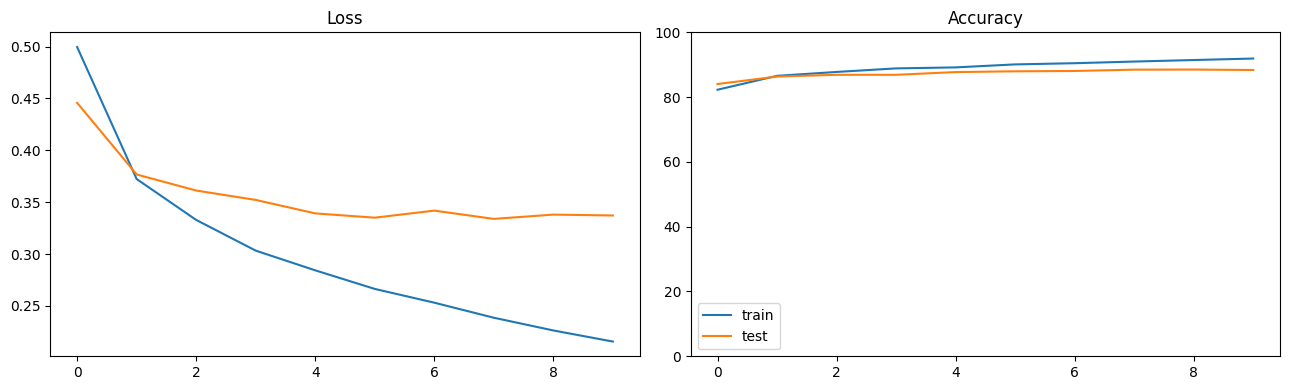

Optimizer: Adagrad


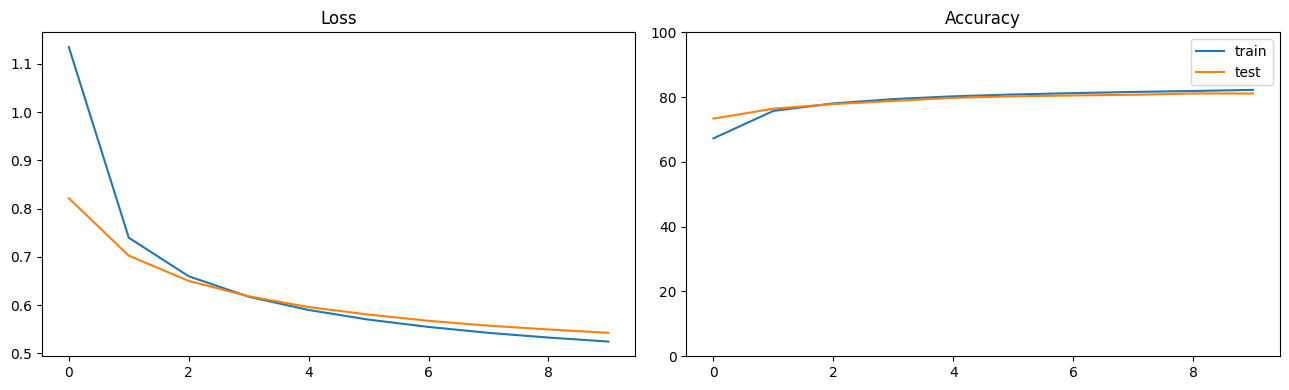

Optimizer: AdamW


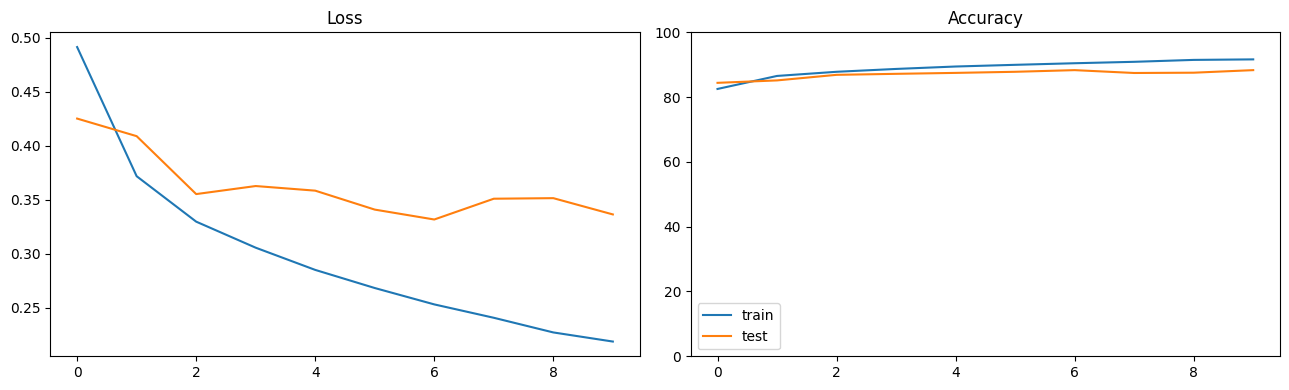

Optimizer: Adamax


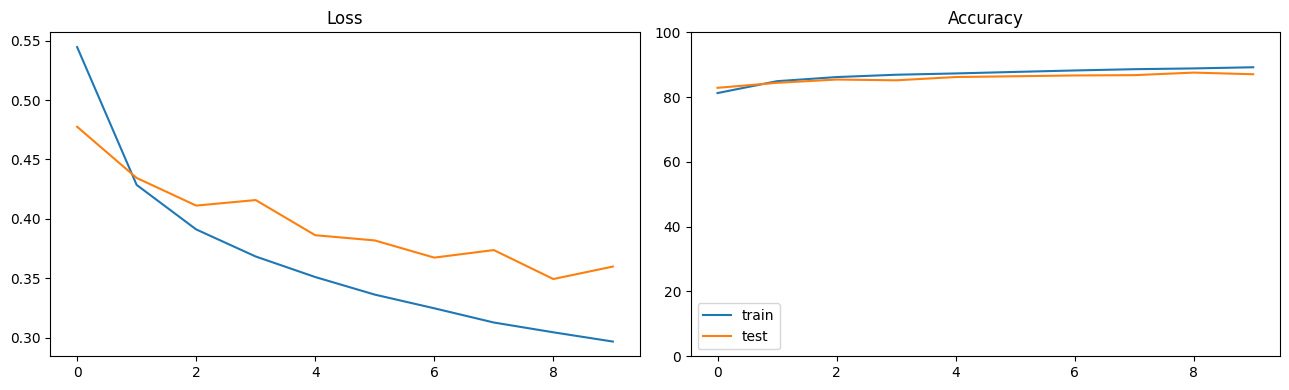

Optimizer: Ftrl


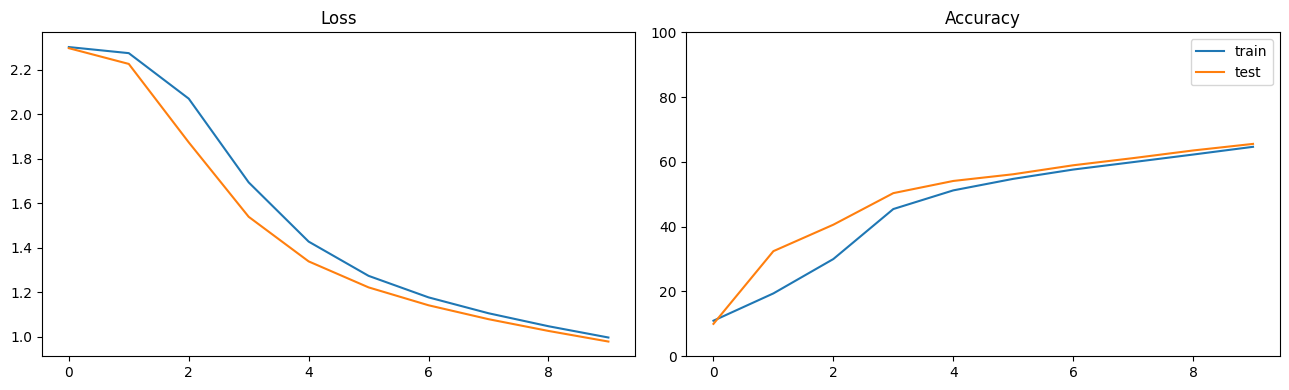

Optimizer: Lion


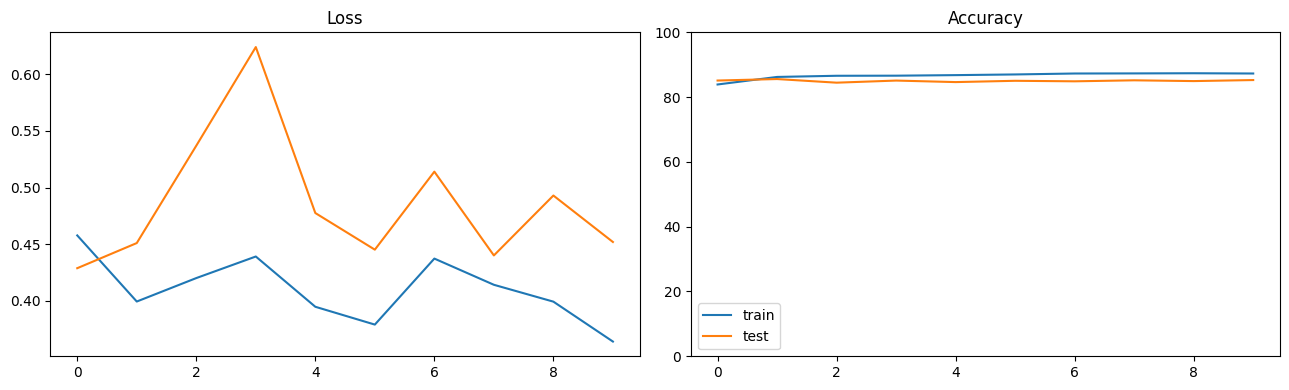

Optimizer: Nadam


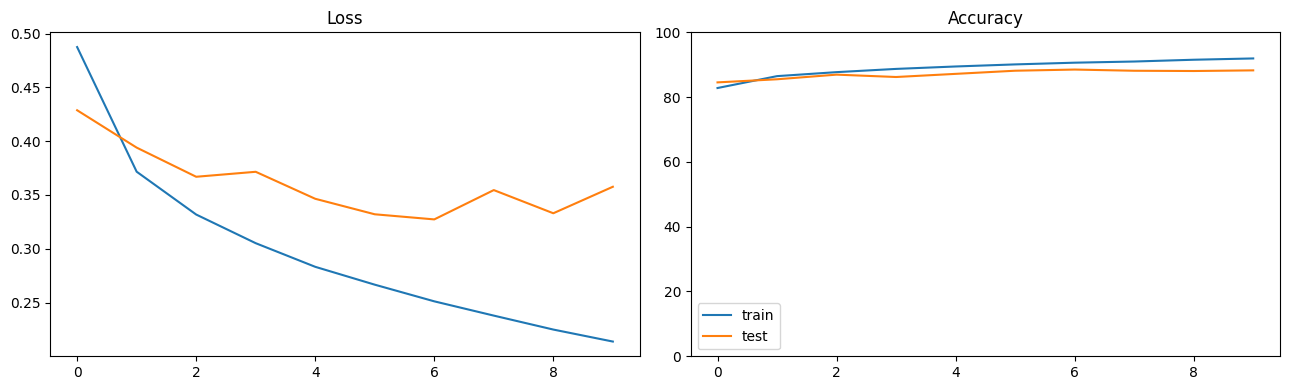

Optimizer: RMSprop


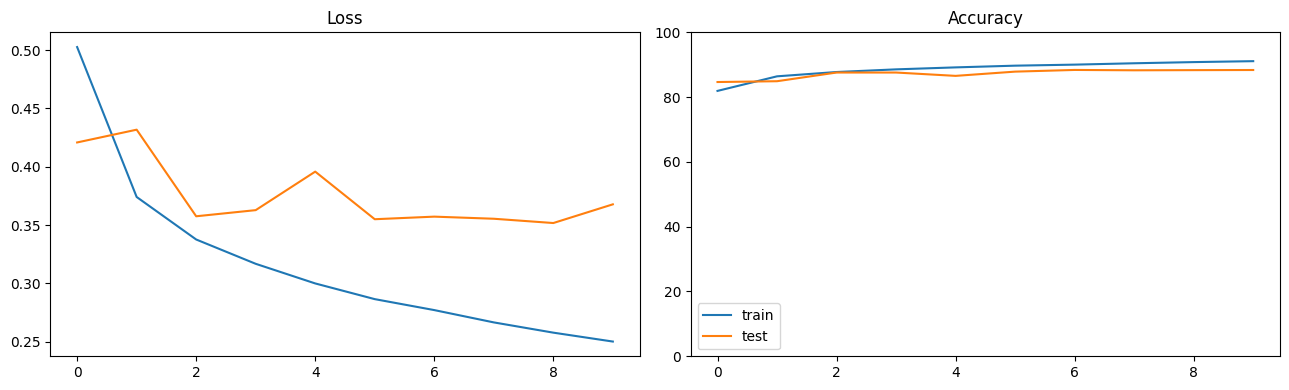

Optimizer: SGD


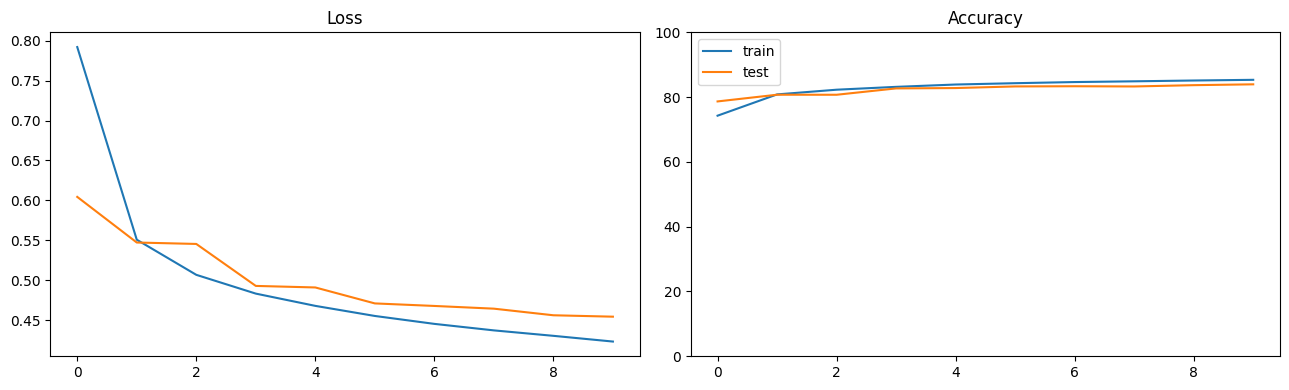

,0,1,2,3,4,5,6,7,8,9
Optimizer: Adam,0.840400,0.863500,0.868900,0.868900,0.877300,0.879700,0.880700,0.884800,0.885100,0.883700
Optimizer: Adagrad,0.733700,0.764200,0.778500,0.788100,0.797700,0.802500,0.805100,0.807300,0.811200,0.811200
Optimizer: AdamW,0.844100,0.851600,0.868800,0.871900,0.874800,0.878200,0.883300,0.874500,0.875400,0.883300
Optimizer: Adamax,0.828700,0.844200,0.854300,0.851900,0.862000,0.864400,0.866900,0.867800,0.875700,0.870600
Optimizer: Ftrl,0.100000,0.324500,0.406200,0.503600,0.541200,0.561900,0.589600,0.611700,0.635300,0.655600
Optimizer: Lion,0.851200,0.855800,0.844600,0.851100,0.846400,0.850400,0.848800,0.851900,0.849500,0.852700
Optimizer: Nadam,0.845500,0.855100,0.869400,0.862100,0.871800,0.881500,0.885100,0.881400,0.880600,0.882600
Optimizer: RMSprop,0.846600,0.849100,0.875900,0.875900,0.865600,0.878700,0.883900,0.882800,0.883300,0.883700
Optimizer: SGD,0.786700,0.807400,0.807300,0.826900,0.828000,0.833000,0.833600,0.832900,0.836900,0.839500


In [71]:
# Оцінимо результат роботи НМ з застосуванням різних оптимізаторів:

histories = {}
opt_list = [
    optimizers.Adam,
    optimizers.Adagrad,
    optimizers.AdamW,
    optimizers.Adamax,
    optimizers.Ftrl,
    optimizers.Lion,
    optimizers.Nadam,
    optimizers.RMSprop,
    optimizers.SGD
]

n = 8
n_hidden_1 = 2 ** n
print(f"n = {n}, layer1: {n_hidden_1}")

for opt in opt_list:
    print(f"Optimizer: {opt.__name__}")
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(n_hidden_1, activation="softplus"))
    model.add(Dense(10, activation="softmax"))

    model.compile(
        loss=losses.SparseCategoricalCrossentropy(),
        optimizer=opt(),
        metrics=[metrics.SparseCategoricalAccuracy()]
    )

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
    plot_history(history)
    histories[f"Optimizer: {opt.__name__}"] = history.history["val_sparse_categorical_accuracy"]

pd.DataFrame(histories).T.style.background_gradient(cmap='viridis')

# Як і очікувалось, оптимізатор Adam забезпечив найкращий результат.

n = 8, layer1: 256
Batch_size: 16


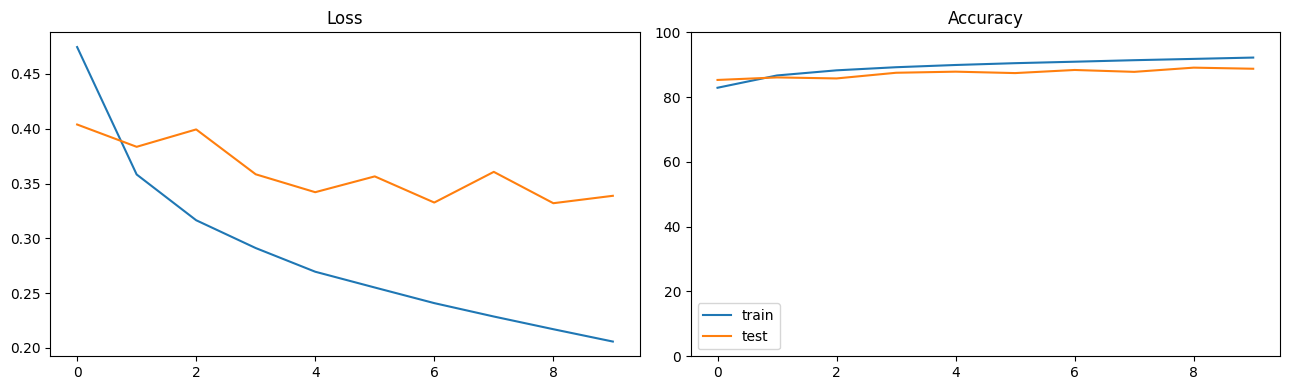

Batch_size: 32


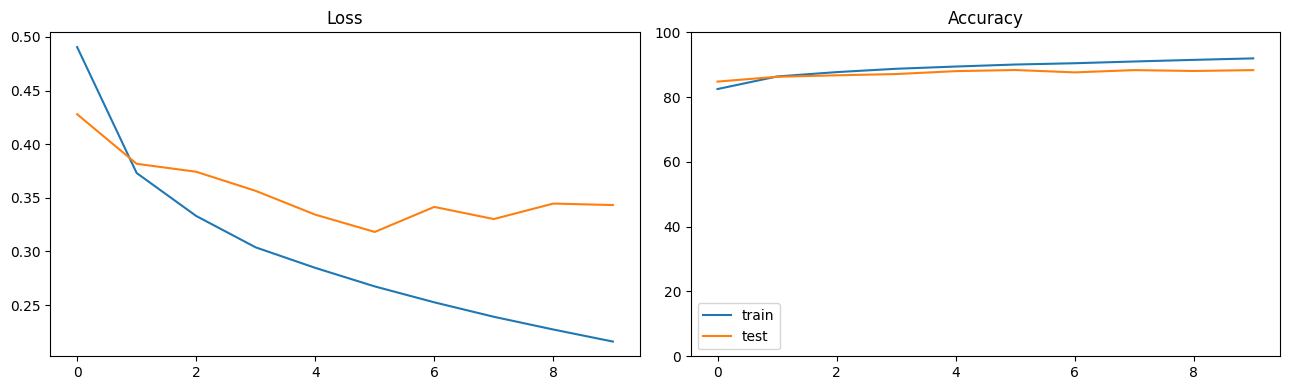

Batch_size: 64


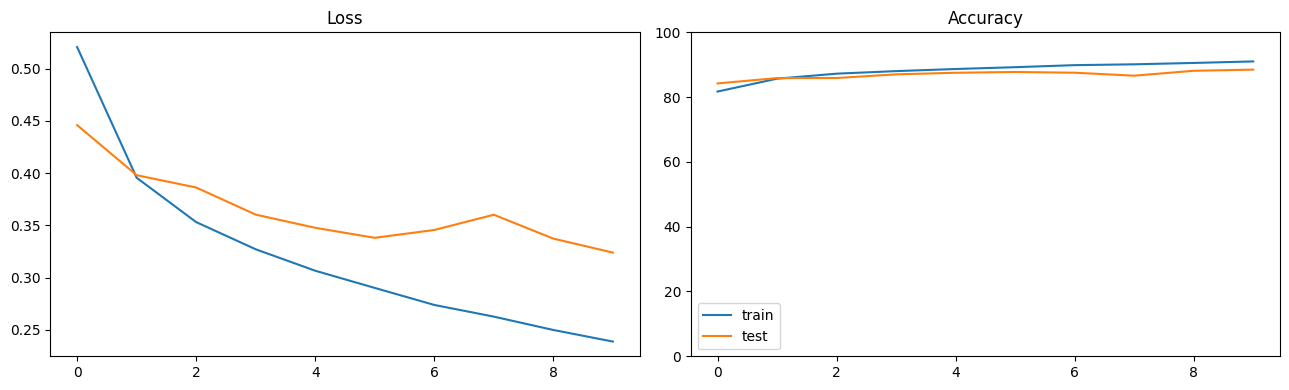

,0,1,2,3,4,5,6,7,8,9
Batch_size: 16,0.853000,0.860800,0.857700,0.875200,0.878600,0.874200,0.883800,0.878000,0.891000,0.887600
Batch_size: 32,0.847900,0.862800,0.867300,0.871200,0.880200,0.883700,0.876400,0.883400,0.880700,0.883400
Batch_size: 64,0.842300,0.858800,0.859000,0.870300,0.875200,0.877600,0.875300,0.866200,0.881300,0.884900


In [73]:
# Оцінимо результат роботи НМ з різними розмірами батчу.
# Візьмемо розмір батчу вдвічі більше і менше ніж розмір по замовчуванню:

histories = {}
n = 8
n_hidden_1 = 2 ** n
print(f"n = {n}, layer1: {n_hidden_1}")

for b_size in [16, 32, 64]:
    print(f"Batch_size: {b_size}")
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(n_hidden_1, activation="softplus"))
    model.add(Dense(10, activation="softmax"))

    model.compile(
        loss=losses.SparseCategoricalCrossentropy(),
        optimizer=optimizers.Adam(),
        metrics=[metrics.SparseCategoricalAccuracy()]
    )

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0, batch_size=b_size)
    plot_history(history)
    histories[f"Batch_size: {b_size}"] = history.history["val_sparse_categorical_accuracy"]

pd.DataFrame(histories).T.style.background_gradient(cmap='viridis')

# Помітного покращення роботи НМ від збільшення або зменшення батчу не спостерігається.


n = 8, layer1: 256


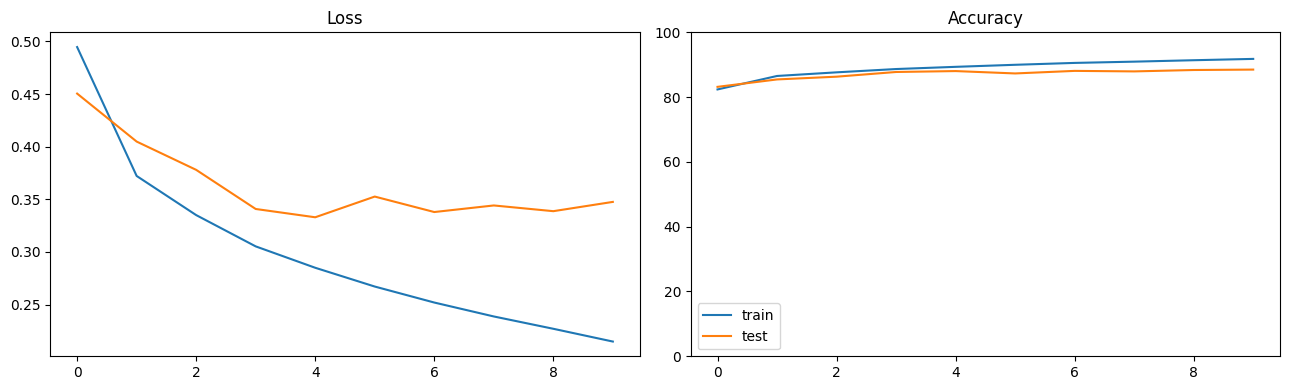

Classification_report for train dataset
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      6000
           1       1.00      0.99      0.99      6000
           2       0.92      0.78      0.84      6000
           3       0.94      0.91      0.93      6000
           4       0.79      0.90      0.84      6000
           5       1.00      0.98      0.99      6000
           6       0.78      0.82      0.80      6000
           7       0.97      0.97      0.97      6000
           8       0.96      1.00      0.98      6000
           9       0.97      0.99      0.98      6000

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.92      0.92      0.92     60000


Classification_report for test dataset
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.8

In [75]:
# Як бачимо отримана НМ може забезпечити потрібну точність не менш ніж 0,91
# на навчальній виборці, але на тестовій виборці досягнути таку точність
# поки не вдалось при жодній використаній комбінації гіперпараметрів.

n = 8
n_hidden_1 = 2 ** n
print(f"n = {n}, layer1: {n_hidden_1}")

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(n_hidden_1, activation="softplus"))
model.add(Dense(10, activation="softmax"))

model.compile(
    loss=losses.SparseCategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=[metrics.SparseCategoricalAccuracy()]
)

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
plot_history(history)

print("Classification_report for train dataset")
print(
    classification_report(
        y_train,
        tf.argmax(model.predict(x_train), axis=1)
    )
)
print("\nClassification_report for test dataset")
print(
    classification_report(
        y_test,
        tf.argmax(model.predict(x_test), axis=1)
    )
)

n = 8, layer1: 256


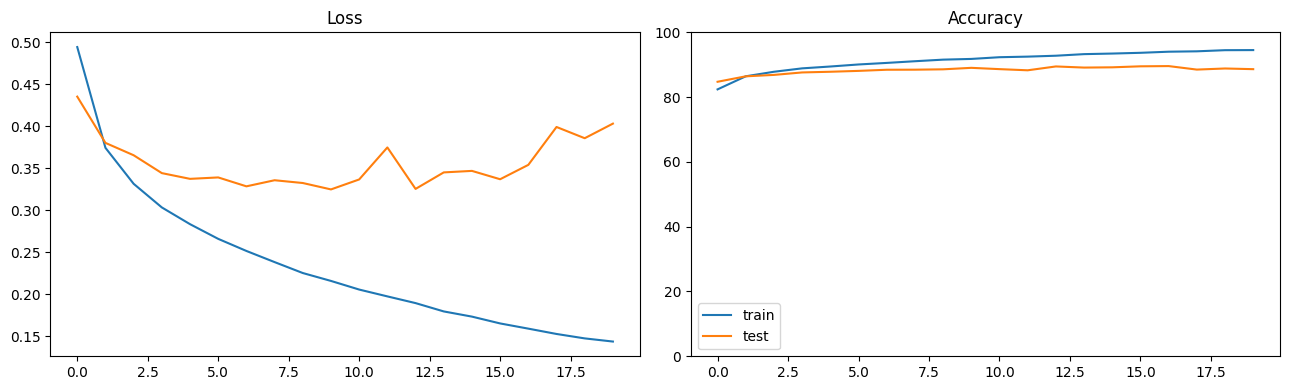

Classification_report for train dataset
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      6000
           1       1.00      1.00      1.00      6000
           2       0.86      0.92      0.89      6000
           3       0.91      0.98      0.94      6000
           4       0.87      0.90      0.89      6000
           5       0.94      1.00      0.97      6000
           6       0.96      0.71      0.82      6000
           7       0.99      0.91      0.95      6000
           8       1.00      1.00      1.00      6000
           9       0.97      0.99      0.98      6000

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000


Classification_report for test dataset
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.8

In [77]:
# Спробуємо збільшити кількість епох.

n = 8
n_hidden_1 = 2 ** n
print(f"n = {n}, layer1: {n_hidden_1}")

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(n_hidden_1, activation="softplus"))
model.add(Dense(10, activation="softmax"))

model.compile(
    loss=losses.SparseCategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=[metrics.SparseCategoricalAccuracy()]
)

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose=0)
plot_history(history)

print("Classification_report for train dataset")
print(
    classification_report(
        y_train,
        tf.argmax(model.predict(x_train), axis=1)
    )
)
print("\nClassification_report for test dataset")
print(
    classification_report(
        y_test,
        tf.argmax(model.predict(x_test), axis=1)
    )
)

# Збільшення епох не призвело до досягнення необхідної точності.


In [79]:
# Забезпечення точності не менше ніж 0,91 на тестовій виборці:
# В статті https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
# наводиться конфігурація НМ, яка здатна забезпечити потрібну точність.
# Досягається це застосуванням додаткових шарів (Conv2D та MaxPooling2D) на вході в НМ для екстракції додаткових
# фічей із зображення (див. п. «Define Model»).
# Застосуємо рекомендації із статті до нашої НМ:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation="relu", kernel_initializer='he_uniform'))
model.add(Dense(10, activation="softmax"))

model.compile(
    loss=losses.SparseCategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=[metrics.SparseCategoricalAccuracy()]
)

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)

print("Classification_report for train dataset")
print(
    classification_report(
        y_train,
        tf.argmax(model.predict(x_train), axis=1)
    )
)
print("\nClassification_report for test dataset")
print(
    classification_report(
        y_test,
        tf.argmax(model.predict(x_test), axis=1)
    )
)

# Потрібна точність забезпечена

Classification_report for train dataset
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      6000
           1       1.00      1.00      1.00      6000
           2       0.95      0.98      0.97      6000
           3       0.99      0.99      0.99      6000
           4       0.96      0.98      0.97      6000
           5       1.00      1.00      1.00      6000
           6       0.95      0.94      0.95      6000
           7       1.00      0.98      0.99      6000
           8       1.00      1.00      1.00      6000
           9       0.98      1.00      0.99      6000

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000


Classification_report for test dataset
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.8